# Convolutional Neural Network

In [1]:
import time
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
PATHTRAIN='./dataset/training_set'
PATHTEST='./dataset/test_set'

CATEGORIES = ["dogs", "cats"]

def show_data(path_set):
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(path_set,category)  # create path to dogs and cats
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            plt.imshow(img_array, cmap='gray')  # graph it
            plt.show()  # display!

            break
        break
    return img_array

IMG_SIZE = 32

def show_resize_data(img_array):
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')
    plt.show()

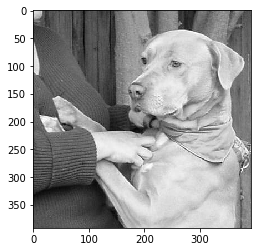

In [3]:
show_data_train = show_data(PATHTRAIN)

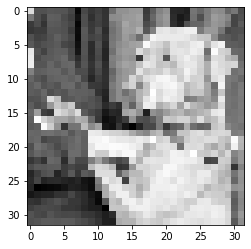

In [4]:
show_resize_data(show_data_train)

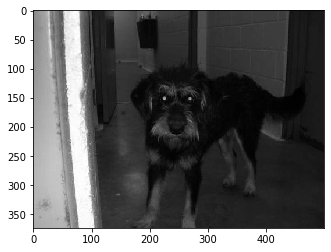

In [5]:
show_data_test = show_data(PATHTEST)

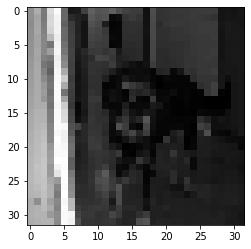

In [6]:
show_resize_data(show_data_test)

In [7]:
def create_set_data(path_set):
    data = []
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(path_set,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    return data

In [8]:
PATHTRAIN='./dataset/training_set'
PATHTESTE='./dataset/test_set'

training_data = create_set_data(PATHTRAIN)
test_data = create_set_data(PATHTEST)

100%|██████████| 1000/1000 [00:04<00:00, 240.13it/s]


In [9]:
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
0
1
0
0
0


In [10]:
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 76]
   [ 52]
   [115]
   ...
   [ 57]
   [150]
   [149]]

  [[102]
   [ 22]
   [107]
   ...
   [ 54]
   [149]
   [153]]

  [[ 36]
   [ 43]
   [107]
   ...
   [135]
   [149]
   [153]]

  ...

  [[ 26]
   [ 69]
   [ 48]
   ...
   [ 79]
   [ 59]
   [ 47]]

  [[ 32]
   [ 96]
   [ 78]
   ...
   [ 50]
   [ 31]
   [ 44]]

  [[ 16]
   [138]
   [130]
   ...
   [158]
   [ 26]
   [ 26]]]]


In [11]:
random.shuffle(test_data)

for sample in test_data[:10]:
    print(sample[1])

0
0
1
0
0
1
0
0
1
1


In [12]:
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[242]
   [240]
   [248]
   ...
   [125]
   [172]
   [124]]

  [[245]
   [252]
   [255]
   ...
   [122]
   [131]
   [130]]

  [[253]
   [252]
   [250]
   ...
   [128]
   [133]
   [116]]

  ...

  [[112]
   [102]
   [147]
   ...
   [ 39]
   [ 43]
   [ 69]]

  [[139]
   [143]
   [124]
   ...
   [ 35]
   [ 35]
   [135]]

  [[134]
   [115]
   [115]
   ...
   [ 34]
   [ 43]
   [ 81]]]]


In [13]:
#import pickle

#pickle_out = open("X.pickle","wb")
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle","wb")
#pickle.dump(y, pickle_out)
#pickle_out.close()

In [14]:
#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

In [15]:
X_train = X_train/255.0

X_test = X_test/255.0

In [16]:
# Initialising the CNN
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
NAME = "Cats-vs-dogs-CNN-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [18]:
history = classifier.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[tensorboard])


Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 29s 4ms/step - loss: 0.6780 - accuracy: 0.5679 - val_loss: 0.6595 - val_accuracy: 0.5995
Epoch 2/10
8000/8000 [==============================] - 27s 3ms/step - loss: 0.6280 - accuracy: 0.6471 - val_loss: 0.6003 - val_accuracy: 0.6985
Epoch 3/10
8000/8000 [==============================] - 27s 3ms/step - loss: 0.5844 - accuracy: 0.6940 - val_loss: 0.5472 - val_accuracy: 0.7320
Epoch 4/10
8000/8000 [==============================] - 27s 3ms/step - loss: 0.5423 - accuracy: 0.7279 - val_loss: 0.5205 - val_accuracy: 0.7485
Epoch 5/10
8000/8000 [==============================] - 28s 4ms/step - loss: 0.5044 - accuracy: 0.7560 - val_loss: 0.5482 - val_accuracy: 0.7370
Epoch 6/10
8000/8000 [==============================] - 28s 3ms/step - loss: 0.4786 - accuracy: 0.7726 - val_loss: 0.5027 - val_accuracy: 0.7715
Epoch 7/10
8000/8000 [==============================] - 27s 3ms/step - loss: 0.44

In [22]:
def print_history_accuracy(history):
    #print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    #print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

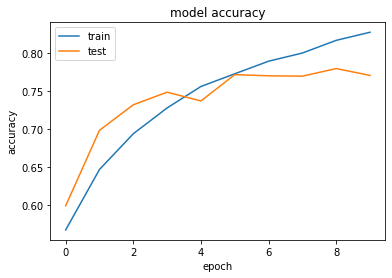

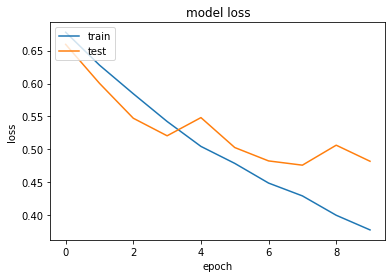

In [23]:
print_history_accuracy(history)
print_history_loss(history)

In [24]:
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4817890982627869
Test accuracy: 0.7705000042915344
